In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
Pitchers_Data = pd.read_csv("../CapstoneProject/PitcherData.csv")

In [3]:
Pitchers_Data.head()

,Player,Year,Age,Team,Wins,Losses,W-L %,ERA,Games,Starts,Saves,Innings,Walks,Strikeouts,WHIP,WAR,Salary,Adj Salary
0,Matt Barnes,2015,25,BOS,3,4,0.428571,5.44,32,2,0,43.0,15,39,1.651,-0.3,238967,268662
1,Matt Barnes,2016,26,BOS,4,3,0.571429,4.05,62,0,1,66.2,31,71,1.395,0.3,511000,530689
2,Matt Barnes,2017,27,BOS,7,3,0.700000,3.88,70,0,1,69.2,28,83,1.220,0.7,563500,557708
3,Matt Barnes,2018,28,BOS,6,4,0.600000,3.65,62,0,0,61.2,31,96,1.265,1.1,605000,605000
4,Ryan Brasier,2018,30,BOS,2,0,1.000000,1.60,34,0,0,33.2,7,29,0.772,1.5,249050,249050


In [4]:
Pitchers_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 18 columns):
Player        1827 non-null object
Year          1827 non-null int64
Age           1827 non-null int64
Team          1827 non-null object
Wins          1827 non-null int64
Losses        1827 non-null int64
W-L %         1827 non-null float64
ERA           1827 non-null float64
Games         1827 non-null int64
Starts        1827 non-null int64
Saves         1827 non-null int64
Innings       1827 non-null float64
Walks         1827 non-null int64
Strikeouts    1827 non-null int64
WHIP          1827 non-null float64
WAR           1827 non-null float64
Salary        1827 non-null int64
Adj Salary    1827 non-null int64
dtypes: float64(5), int64(11), object(2)
memory usage: 257.0+ KB


In [5]:
Pitchers_Data.corr()

,Year,Age,Wins,Losses,W-L %,ERA,Games,Starts,Saves,Innings,Walks,Strikeouts,WHIP,WAR,Salary,Adj Salary
Year,1.000000,0.375986,-0.137394,-0.110166,-0.010367,-0.010459,0.119263,-0.148304,0.057606,-0.143663,-0.166652,-0.084042,-0.062619,-0.088045,0.123523,0.056969
Age,0.375986,1.000000,0.009207,-0.052678,0.112318,-0.136381,0.237007,-0.087569,0.128978,-0.022749,-0.064802,0.026116,-0.141315,0.044715,0.432635,0.403850
Wins,-0.137394,0.009207,1.000000,0.623405,0.399376,-0.208475,0.044141,0.827857,-0.149230,0.900897,0.742364,0.876251,-0.244219,0.738373,0.406230,0.428384
Losses,-0.110166,-0.052678,0.623405,1.000000,-0.119119,0.071612,0.004856,0.813740,-0.108280,0.813855,0.792757,0.727217,0.012229,0.317270,0.279464,0.290079
W-L %,-0.010367,0.112318,0.399376,-0.119119,1.000000,-0.406093,0.158209,0.116985,-0.019981,0.204665,0.116841,0.227373,-0.375046,0.351922,0.108181,0.112046
ERA,-0.010459,-0.136381,-0.208475,0.071612,-0.406093,1.000000,-0.343480,0.003406,-0.222470,-0.149988,-0.023140,-0.218147,0.795004,-0.490999,-0.073002,-0.076849
Games,0.119263,0.237007,0.044141,0.004856,0.158209,-0.343480,1.000000,-0.264399,0.443656,0.059994,0.061899,0.136655,-0.311831,0.141721,0.003897,-0.001652
Starts,-0.148304,-0.087569,0.827857,0.813740,0.116985,0.003406,-0.264399,1.000000,-0.275381,0.930510,0.837130,0.845565,-0.048106,0.554104,0.371433,0.388569
Saves,0.057606,0.128978,-0.149230,-0.108280,-0.019981,-0.222470,0.443656,-0.275381,1.000000,-0.135209,-0.145382,-0.051707,-0.221262,0.056850,0.042281,0.035634
Innings,-0.143663,-0.022749,0.900897,0.813855,0.204665,-0.149988,0.059994,0.930510,-0.135209,1.000000,0.864461,0.942942,-0.194040,0.687939,0.402220,0.425014


In [6]:
Pitchers_Data.describe()

,Year,Age,Wins,Losses,W-L %,ERA,Games,Starts,Saves,Innings,Walks,Strikeouts,WHIP,WAR,Salary,Adj Salary
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03,1.827000e+03
mean,2014.958949,27.105638,5.222770,4.626163,0.492034,3.961365,33.375479,10.711002,2.562124,86.091024,28.727969,80.742200,1.303019,1.172742,2.990249e+06,3.288924e+06
std,2.887060,3.378676,4.788422,3.808797,0.258427,1.735845,20.059801,12.507509,7.794798,62.242867,20.241745,60.201722,0.295724,1.691986,5.119833e+06,5.594589e+06
min,2002.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,-2.300000,4.000000e+02,6.120000e+02
25%,2013.000000,25.000000,2.000000,2.000000,0.333333,2.910000,19.000000,0.000000,0.000000,38.100000,13.000000,35.000000,1.135500,0.000000,4.140000e+05,5.295010e+05
50%,2016.000000,27.000000,4.000000,4.000000,0.500000,3.740000,30.000000,4.000000,0.000000,66.000000,23.000000,65.000000,1.280000,0.700000,5.470000e+05,6.308490e+05
75%,2017.000000,29.000000,8.000000,7.000000,0.666667,4.710000,45.500000,22.000000,1.000000,130.050000,42.000000,111.000000,1.441000,1.900000,3.407776e+06,3.710760e+06
max,2018.000000,41.000000,24.000000,19.000000,1.000000,18.000000,82.000000,35.000000,57.000000,253.000000,105.000000,369.000000,3.300000,10.500000,3.300000e+07,3.644937e+07


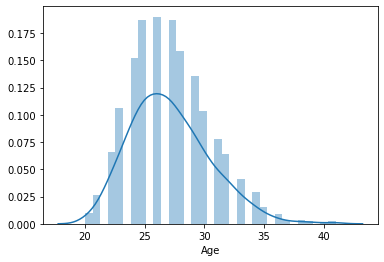

In [7]:
sns.distplot(Pitchers_Data['Age'])

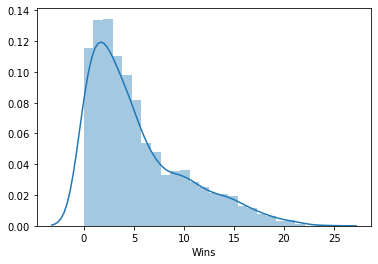

In [8]:
sns.distplot(Pitchers_Data['Wins'])

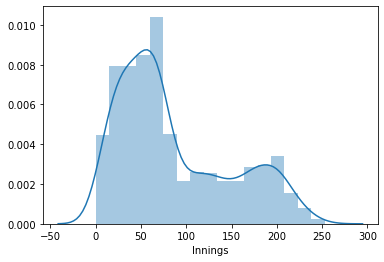

In [9]:
sns.distplot(Pitchers_Data['Innings'])

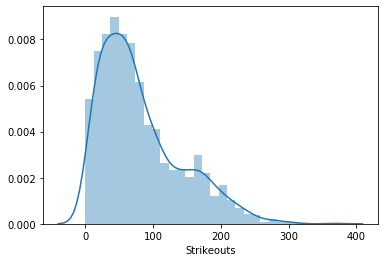

In [11]:
sns.distplot(Pitchers_Data['Strikeouts'])

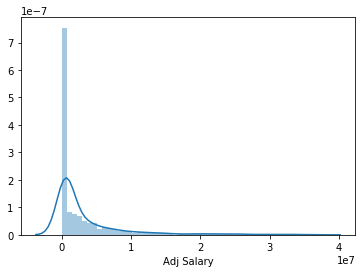

In [13]:
sns.distplot(Pitchers_Data['Adj Salary'])

Text(0, 0.5, 'Adjusted Salary')

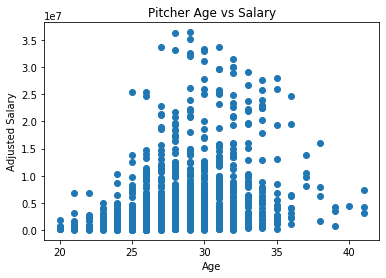

In [22]:
X = Pitchers_Data['Age']
Y = Pitchers_Data['Adj Salary']
plt.scatter(X, Y)
plt.title("Pitcher Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Adjusted Salary")

Text(0, 0.5, 'Adjusted Salary')

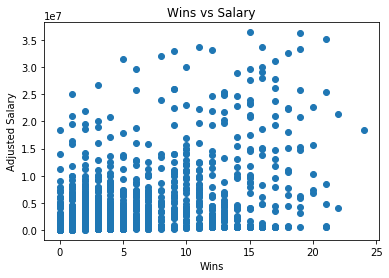

In [18]:
X = Pitchers_Data['Wins']
Y = Pitchers_Data['Adj Salary']
plt.scatter(X, Y)
plt.title("Wins vs Salary")
plt.xlabel("Wins")
plt.ylabel("Adjusted Salary")

Text(0, 0.5, 'Adjusted Salary')

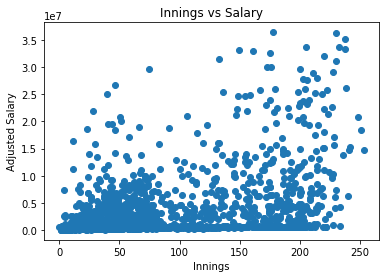

In [20]:
X = Pitchers_Data['Innings']
Y = Pitchers_Data['Adj Salary']
plt.scatter(X, Y)
plt.title("Innings vs Salary")
plt.xlabel("Innings")
plt.ylabel("Adjusted Salary")

Text(0, 0.5, 'Adjusted Salary')

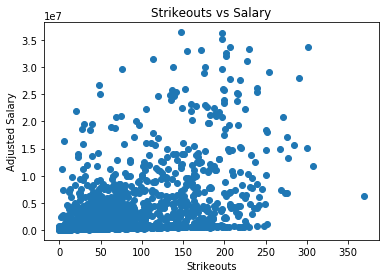

In [21]:
X = Pitchers_Data['Strikeouts']
Y = Pitchers_Data['Adj Salary']
plt.scatter(X, Y)
plt.title("Strikeouts vs Salary")
plt.xlabel("Strikeouts")
plt.ylabel("Adjusted Salary")